In [ ]:
from ecell4 import *
import numpy as np
import math
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
from ecell4.extra import ensemble

def wrap(job,job_id,task_id):
    def singlerun(kaf,run,correct,L,conc,shift):
        import numpy as np
        from math import sqrt
        rm = 0.005
        run+=shift
        rng = GSLRandomNumberGenerator()
        rng.seed(run)
        D = 1
        kd= 4.0*math.pi*D*2*rm
        ka = kaf*kd
        voxelr=rm
        tm =(2*voxelr)**2/(4*D)        
        duration=0.2#tm*5e4#tm*5e3
        w = spatiocyte.SpatiocyteWorld(Real3(L,L,L),voxelr,rng)
        N=100
        #print(lx,ly,lz)
        #print(size[0],size[1],size[2])
        #print(Nmv*(voxelr*2)**2)
        Da=0
        Db=0
        if correct==1:
            Da=1
        elif correct==2:
            Db=1
        with species_attributes():
            A |  {'D': str(Da), 'radius':str(voxelr)}
            B |  {'D': str(Db), 'radius':str(voxelr)}

        with reaction_rules():
            A + B > B | ka

        m2 = get_model()
        if run==1:
            print('Da{},Db{}'.format(Da,Db))
        #print('ka',ka,'Rv',voxelr*2)
        w.bind_to(m2)
        w.add_molecules(Species('A'), N)
        w.add_molecules(Species('B'), N*5)
        #pid,p=w.get_particle(Species('A'))
        #w.list_structure_particles()
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        #print(sim.dt(),tm)
        tfactor=50
        #obs=NumberObserver(['A'])
        obs = FixedIntervalNumberObserver(tm*tfactor,['A'])
        sim.run(duration,obs)       
        data=obs.data()    
        
        return data
    job.update({'run':task_id})
    out=singlerun(**job)
    return out      

simrun=3000
kaf=100
nproc=500#250#
L=2
shift=0
# works in low conc, deviate when conc is high
result=[]
cor='new'
conc=2.38
for cor in [1,2]:
    jobs=[{'kaf':kaf,'correct':cor,'conc':conc,'L':L,'shift':shift}]    
    #ensemble.run_slurm(wrap,jobs,n=simrun,nproc=nproc,path='tmp',modules=('numpy','ecell4','math'),extra_args=['--exclude=ibc[02,12,27]'])[0]
    res=ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=nproc,modules=('numpy','ecell4','math'))[0]
    res=np.array(res)
    t=np.mean(res.T[0],axis=1)
    nt = np.mean(res.T[1],axis=1)     
    result.append([t,nt])

Da1,Db0
Da0,Db1


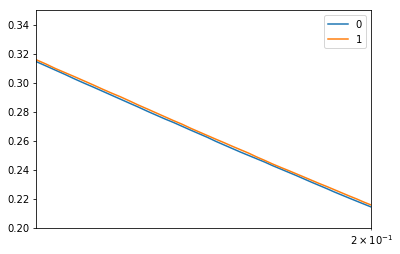

In [30]:
i=0
for t,nt in result:
    plt.semilogx(t,nt/100,label=str(i))
    i+=1
plt.xlim(0.15,0.2)
plt.ylim(0.2,0.35)
plt.legend()

In [16]:
in 3D, St decay faster when Db=0,Da=1
in 2D, st decay faster when Da=0

(161,)

In [11]:
from math import sqrt
gam = (2 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0) + sqrt(22.0))**2/(72 * (6 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0)))            
gam, 1./2/sqrt(3)

(0.28986264423934294, 0.2886751345948129)

In [10]:
factor = ((2 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0) + sqrt(22.0))/((6 * sqrt(2.0) + 4 * sqrt(3.0) + 3 * sqrt(6.0))))**2            
factor,1

(0.9168857180924649, 1)